Bitcoin Json Parsing

Within this email is attached the block 750000 of the bitcoin blockchain in a JSON format.
If you are not familiar with it, don’t worry here are some explanations to help you understand the data.

Block data contains:
    • Block information such as the time when it was mined, its number, the hash of the block (identifier), the previous block hash, the next block hash, …
    • A list of transactions which are included in the block, and that were verified and approved by the Bitcoin Network

In [1]:
# Import liberies
import json
import pandas as pd
import numpy as np
import sys 
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [2]:
with open('data/bitcoin_block_750000.json') as json_file:
    json_data = json.load(json_file)

 1) Parsing of SON block into a table (or several tables) to ease the following data analysis

In [3]:
# Parsing Json to 3 dataframes, 1 for input (vin), 1 for output, 1 for general info for each t

def parsing_btc_block (json_data):
    """
    Function for parsing a btc block to input, output and general transaction data in order
    to compute analysis on the block, regarding the tx values and fees

    Args:
        json_data (json)  : json of the btc chain block

    Returns:
        vin_data (dataframe)  : dataframe containing relevant fields of the transactions\'s input part
        vout_data (dataframe) : dataframe containing relevant fields of the transactions\'s output part
        tx_data (dataframe)   : dataframe containing relevant fields of the transactions\'s info part
    
    """



    # Parsing Json to 3 dataframes, 1 for input (vin), 1 for output, 1 for general info for each tx
    vin_data = pd.DataFrame()
    vout_data = pd.DataFrame()
    tx_data = pd.DataFrame()

    for i,d in enumerate(json_data['result']['tx']):
        print ("---"*5,i,json_data['result']['tx'][i]["txid"])

        try:
            new_tx_row = {
                "txid" : json_data['result']['tx'][i]["txid"], \
                "hash" : json_data['result']['tx'][i]["hash"], \
                "locktime" : json_data['result']['tx'][i]["locktime"], \
                "fee" : json_data['result']['tx'][i]["fee"]
                }
        except:
            new_tx_row = {
                "txid" : json_data['result']['tx'][i]["txid"], \
                "hash" : json_data['result']['tx'][i]["hash"], \
                "locktime" : json_data['result']['tx'][i]["locktime"], \
                "fee" : 0
                }

        # adding row to tx table
        tx_data = tx_data.append(new_tx_row,ignore_index = True)

        for e,c in enumerate(d["vin"]):
            #print (i,"vin: ",e, c)
            try:
            
                # print(p,d["vin"][e]["prevout"][p])
             
                new_vin_row = {\
                "txid":json_data['result']['tx'][i]["txid"],
                "vin_txid":d["vin"][e]["txid"],
                "vin_vout":d["vin"][e]["vout"],
                "vin_prevout_value": d["vin"][e]["prevout"]["value"], 
                "vin_address" : d["vin"][e]["prevout"]["scriptPubKey"]["address"],
                "vin_sequence":d["vin"][e]["sequence"]
                }
                
                # adding row to input table
                vin_data = vin_data.append(new_vin_row,ignore_index = True)
                
                #print(d["vin"][e]["prevout"]["scriptPubKey"]["address"])

            except:
                pass
        

        for ve,vc in enumerate(d["vout"]):
            # print (i,"vout: ", ve, r)
            try:
                print (d["vout"][ve]["scriptPubKey"]["address"])
                new_vout_row = {
                    "txid" :json_data['result']['tx'][i]["txid"], 
                    "vout_n" : d["vout"][ve]["n"], 
                    "vout_value" : d["vout"][ve]["value"], 
                    "vout_address" : d["vout"][ve]["scriptPubKey"]["address"]
                    }
            except:
                print ("no address")
                new_vout_row = {
                    "txid" :json_data['result']['tx'][i]["txid"], 
                    "vout_n" : d["vout"][ve]["n"], 
                    "vout_value" : d["vout"][ve]["value"], 
                    "vout_address" : ''}

            # adding row to the output dataframe
            vout_data = vout_data.append(new_vout_row,ignore_index = True)

    # returning dataframes
    return vin_data,vout_data,tx_data

In [4]:
vin_data,vout_data,tx_data = parsing_btc_block (json_data)

--------------- 0 be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe41fce39af1c8b7ef40
38XnPvu9PmonFU9WouPXUjYbW91wa5MerL
no address
no address
no address
--------------- 1 f5fa7035d685e066f16e36dba8e6b4f6bbccabaa620798e702925e638d0f61b0
bc1qjgltmjtp82dsxvwjmjj8sa5zccerg8f4v9qxdr
--------------- 2 d7122e8aa8d76cd0f6a2909a87db324efa0e4fec6c30a8ee0ec301ace6fab068
1FbS6wVs5wiZNJicSh3eD5aySwyN3jgQEc
bc1qgsjr679y485tsf83nyylq7hdah9k898ecch39m
--------------- 3 f1b533b83481c387db262c8275dd16e07748db95b2effc8e175302fdece06a6d
35N29C81zevzkRSUjRHJPJ3GDraQJPvZEF
--------------- 4 70b890ed2a5e2306015ff61175b17314099cf3d7fa9b9737a72d6b0837406e74
1D9ZATH6U47m14Wp89Ms2W4jszgHkXnTGF
--------------- 5 778c1c5010d131cc325ad425761d12e921fe17bc5397bd65b2c06dee2914d622
bc1qe7eru3nx4ngjvy8q7jsmlw8t93tk0flqqzn2e8
bc1qr4arzknseehls65pgsxdhuxfekgs5h9q3g9naf
--------------- 6 8de7127c7b1bb87120bcc458a99451f454905746df26b51ab4010ffecf8f3834
38dces4hHCXtzfF1ExzsSq9PzyKq4pxgMf
38DGdW15PWdYZPBnA39yvPMh8AGZYYV6Uh
----

In [5]:
tx_data.head()

,txid,hash,locktime,fee
0,be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe...,97eba678b0938475cd9a09e70ff0e1f4834b1af3ef34f1...,0,0.000000
1,f5fa7035d685e066f16e36dba8e6b4f6bbccabaa620798...,65577a5d45f8b5f7bdae3b72599afb6778970204c9ac46...,749999,0.000534
2,d7122e8aa8d76cd0f6a2909a87db324efa0e4fec6c30a8...,6acf96da457e739854adde28e4150ef6cdcea4b021829a...,749999,0.000633
3,f1b533b83481c387db262c8275dd16e07748db95b2effc...,4229db76c916c58e5495840649f1f20ea29e498132b734...,0,0.000948
4,70b890ed2a5e2306015ff61175b17314099cf3d7fa9b97...,426fac59a6f2f70059bf797914a87a41d82a1189652e0a...,749999,0.000394


In [6]:
vin_data.head()

,txid,vin_txid,vin_vout,vin_prevout_value,vin_address,vin_sequence
0,f5fa7035d685e066f16e36dba8e6b4f6bbccabaa620798...,04633d10686e4365845a4b1a86acf6dd1e063d556eb5cc...,0,0.000087,bc1qglltn8pf0e92krme9szxazl42u7e3e2t43t6wy,4294967294
1,f5fa7035d685e066f16e36dba8e6b4f6bbccabaa620798...,9a7ab57058585ba74cd56ba4d3ea3de0365b09ab80bc9b...,1,0.021396,bc1qd266a3kscym7ck9u0x538gs8zksn8ez224lafg,4294967294
2,d7122e8aa8d76cd0f6a2909a87db324efa0e4fec6c30a8...,25bfe95dd481abec777729bfeaf0dc61dab0ec4e2ae1f8...,1,0.013129,bc1q98paqctuylau42ps94dagsdxru9tnjen9ulzlk,4294967294
3,d7122e8aa8d76cd0f6a2909a87db324efa0e4fec6c30a8...,4f6853c18cfb7613098d9d53656bebdb43faa86793f996...,0,0.006424,bc1qjcyzvf0rvmyu8jg4q4umvkkaku82mgmsj9fjze,4294967294
4,f1b533b83481c387db262c8275dd16e07748db95b2effc...,972f825fcacb074ad2fe2f5762b3a0709f191c42823c85...,9,0.050663,bc1qwmxc4jfuhytg63x8alths5v3mfvgr7v55nk6n5mxyt...,4294967295


In [7]:
vout_data.head()

,txid,vout_n,vout_value,vout_address
0,be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe...,0,6.418364,38XnPvu9PmonFU9WouPXUjYbW91wa5MerL
1,be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe...,1,0.000000,
2,be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe...,2,0.000000,
3,be3c1a70dfcaa5c6c0cb2bbd2404ec93ede928b93b30fe...,3,0.000000,
4,f5fa7035d685e066f16e36dba8e6b4f6bbccabaa620798...,0,0.020949,bc1qjgltmjtp82dsxvwjmjj8sa5zccerg8f4v9qxdr


In [8]:
print ("input txid:",vin_data["txid"].nunique())
print ("tx txid:",tx_data["txid"].nunique())
print ("output txid:",vout_data["txid"].nunique())


input txid: 2495
tx txid: 2496
output txid: 2496


In [9]:
# Grouping By txid and counting the output numbers
dfx = vout_data.groupby("txid")[["vout_n"]].count()
print (dfx)

                                                    vout_n
txid                                                      
0009b21ee4741fb880a26aef3716b110773d5dd16bffde2...       2
00293ab1386119f266507932ec23a1b3868fb12f17f4a69...      55
0029c89c3da58480fe76d88eb3b56f672870a549fa32e09...       2
002f674b5aaa0df91ce8db768a0d40f3ab27e54e51fe4db...       2
00376704c7000961f49c5153f38df6f19cd71054aa018a2...       2
...                                                    ...
ffbe2649c44c1761d6ef2e94c0f38441cc9ce6ea51ccf2d...      15
ffd30465b1c2bd33e0341d049f6173a55b6848b5bf1d34f...       2
ffe07f6bcc74a5d2bbf5c5273ce71bc39f2c195fcd6f9f7...       2
ffe441214ba60ca8528613efebf20c216b97d87ddaaef4e...       2
ffe5df09fe8f1781cc77aae9c1fd3fe67060f742317fc08...       4

[2496 rows x 1 columns]


    2) Count the number of transactions containing:
        a. 1 to 5 outputs
        b. 6 to 25 outputs
        c. 26 to 100 outputs
        d. 101 and + outputs (we will call them batched transactions)

In [10]:
# seeing the quantity of transactions with output numbers between value1 and value 2

def condition_vout (dfx, value1=1,value2=1):
    """
    function for seeing the quantity of transactions with output numbers between value1 and value 2

    Args:
    dfx (dataframe) : input dataframe
    value1 (int) : higher than value
    value2 (int) : lower than value

    Returns:
    result (int) : returns counted qty of tx
    """
    
    if value1 >= 101: # batched transactions
        return dfx[ (dfx["vout_n"]>=value1)].count()
    else:
        return dfx[ (dfx["vout_n"]>=value1) & (dfx["vout_n"]<=value2)].count()
    

In [11]:
# Defining conditions for counting

a = condition_vout(dfx, 1,5)
b = condition_vout(dfx, 6,25)
c = condition_vout(dfx, 26,100)
d = condition_vout(dfx, value1=101)

result_output = {"a. 1 to 5 outputs":a,\
                "b. 6 to 25 outputs ":b,\
                "c. 26 to 100 outputs":c,\
                "d. 101 and + outputs":d \
                }

In [12]:
# transform format of df
df_result_q1 = pd.DataFrame(result_output).T

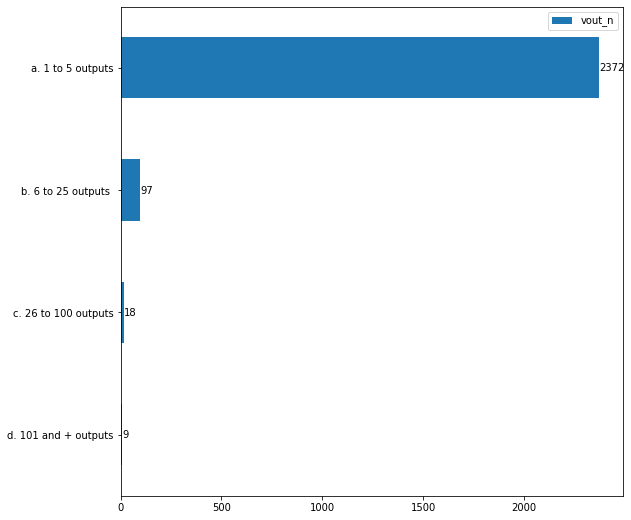

In [13]:
# Visualization of results
ax = df_result_q1.sort_values(by="vout_n").plot.barh(figsize=(9, 9))
ax.bar_label(ax.containers[0])
plt.show()

3 ) Compute the median and average fee of batched transactions

In [14]:
# 101 and + outputs (we will call them batched transactions)
batched_tx = dfx[dfx["vout_n"]>101].reset_index()[["txid"]]

In [15]:
# getting the fees related with the txid
merged= pd.merge(tx_data,batched_tx , on="txid", how="inner")

In [16]:
# Overview 101+ outputs transactions batched transactions
merged[["fee"]].describe()

,fee
count,9.000000
mean,0.000081
std,0.000038
min,0.000059
25%,0.000062
50%,0.000064
75%,0.000069
max,0.000172


In [17]:
# print the median fee of batched transactions
print ("median fee of batched transactions ", merged["fee"].median())

median fee of batched transactions  6.415e-05


In [18]:
# show the mean fee of batched transactions
print ("mean fee of batched transactions ", merged["fee"].mean())

mean fee of batched transactions  8.126111111111112e-05


    4) Identify the most expensive transaction (highest sum of amounts of the inputs) and display:
        a. Txid (transaction id)
        b. Count of inputs/outputs of this transaction
        c. Sum of inputs/outputs of this transaction

In [19]:
# Getting the consolidated data for the inputs
input_premerge = vin_data.groupby(by="txid").aggregate({'vin_vout': 'count','vin_prevout_value': 'sum'})

In [20]:
input_premerge

,vin_vout,vin_prevout_value
txid,,
0009b21ee4741fb880a26aef3716b110773d5dd16bffde295c9cc5c3732a8d5b,1,0.011518
00293ab1386119f266507932ec23a1b3868fb12f17f4a69adba59060b4002503,1,1.000000
0029c89c3da58480fe76d88eb3b56f672870a549fa32e091e2f14151e1eee093,1,0.020033
002f674b5aaa0df91ce8db768a0d40f3ab27e54e51fe4db50a5f5e1e708ee403,1,0.026411
00376704c7000961f49c5153f38df6f19cd71054aa018a2b2c123a966d4c3939,1,1.465856
...,...,...
ffbe2649c44c1761d6ef2e94c0f38441cc9ce6ea51ccf2de061892aee0f562f0,1,1.254438
ffd30465b1c2bd33e0341d049f6173a55b6848b5bf1d34f55568e24d8e19840f,1,0.011059
ffe07f6bcc74a5d2bbf5c5273ce71bc39f2c195fcd6f9f7d0aa6763a37ba36b8,1,0.833715


In [21]:
# Getting the consolidated data for the outputs
output_premerge = vout_data.groupby(by="txid").aggregate({'vout_n': 'count','vout_value': 'sum'})

In [22]:
# Merging the grouped input and output tables 
merge_input_output = pd.merge(input_premerge,output_premerge, how='outer', on=['txid'])

In [23]:
# resetting index of the grouped df
merge_input_output = merge_input_output.reset_index()

In [24]:
merge_input_output
# We see that the first transaction which was the coinbase hasn't any previous input

,txid,vin_vout,vin_prevout_value,vout_n,vout_value
0,0009b21ee4741fb880a26aef3716b110773d5dd16bffde...,1.0,0.011518,2,0.011493
1,00293ab1386119f266507932ec23a1b3868fb12f17f4a6...,1.0,1.000000,55,0.999792
2,0029c89c3da58480fe76d88eb3b56f672870a549fa32e0...,1.0,0.020033,2,0.020015
3,002f674b5aaa0df91ce8db768a0d40f3ab27e54e51fe4d...,1.0,0.026411,2,0.026392
4,00376704c7000961f49c5153f38df6f19cd71054aa018a...,1.0,1.465856,2,1.465838
...,...,...,...,...,...
2491,ffd30465b1c2bd33e0341d049f6173a55b6848b5bf1d34...,1.0,0.011059,2,0.011041
2492,ffe07f6bcc74a5d2bbf5c5273ce71bc39f2c195fcd6f9f...,1.0,0.833715,2,0.833681
2493,ffe441214ba60ca8528613efebf20c216b97d87ddaaef4...,1.0,0.037038,2,0.036956
2494,ffe5df09fe8f1781cc77aae9c1fd3fe67060f742317fc0...,101.0,558.695854,4,558.692240


In [25]:
merge_input_output = merge_input_output.rename(columns={"vin_vout":"count_inputs",
                                    "vin_prevout_value":"sum_input_values",
                                    "vout_n":"count_outputs",
                                    "vout_value":"sum_output_values"})

In [26]:
# verification of NaN
merge_input_output.isna().sum()

txid                 0
count_inputs         1
sum_input_values     1
count_outputs        0
sum_output_values    0
dtype: int64

In [27]:
# We can replace the NaN with 0, because there aren't input values in the first tx
merge_input_output.fillna(0, inplace=True)

In [28]:
# Merged table NaN replaced
merge_input_output

,txid,count_inputs,sum_input_values,count_outputs,sum_output_values
0,0009b21ee4741fb880a26aef3716b110773d5dd16bffde...,1.0,0.011518,2,0.011493
1,00293ab1386119f266507932ec23a1b3868fb12f17f4a6...,1.0,1.000000,55,0.999792
2,0029c89c3da58480fe76d88eb3b56f672870a549fa32e0...,1.0,0.020033,2,0.020015
3,002f674b5aaa0df91ce8db768a0d40f3ab27e54e51fe4d...,1.0,0.026411,2,0.026392
4,00376704c7000961f49c5153f38df6f19cd71054aa018a...,1.0,1.465856,2,1.465838
...,...,...,...,...,...
2491,ffd30465b1c2bd33e0341d049f6173a55b6848b5bf1d34...,1.0,0.011059,2,0.011041
2492,ffe07f6bcc74a5d2bbf5c5273ce71bc39f2c195fcd6f9f...,1.0,0.833715,2,0.833681
2493,ffe441214ba60ca8528613efebf20c216b97d87ddaaef4...,1.0,0.037038,2,0.036956
2494,ffe5df09fe8f1781cc77aae9c1fd3fe67060f742317fc0...,101.0,558.695854,4,558.692240


In [32]:
# Themost expensive transaction (highest sum of amounts of the inputs)
# txid = transaction id, 
# count_inputs = number of inputs, sum_input_values = total of transaction's input values,
# count_outputs = number of outputs , sum_output_values = total of transaction's output values


merge_input_output[merge_input_output.sum_input_values	 == merge_input_output.sum_input_values.max()]

,txid,count_inputs,sum_input_values,count_outputs,sum_output_values
2360,f1d645130125e0eaddb514d5ea5b8f9ad516941f5f77bb...,1.0,6829.078302,2,6829.078282


<AxesSubplot:xlabel='Density', ylabel='sum_output_values'>

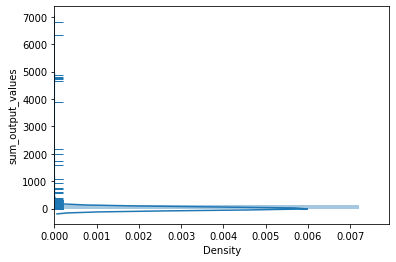

In [31]:
sns.distplot( merge_input_output["sum_output_values"], vertical=True, hist=True, kde=True, rug=True )